In [1]:
# For interactive plots, comment the next line
%pylab inline
# For interactive plots, uncomment the next line
# %pylab ipympl
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Introduction
For instructions on using Jupyter notebooks, see the [README.md](../../README.md) file. 

This notebook demonstrates how to run PODPAC Pipeline on AWS Lambda. Specifically, we will:
* Create a node and execute it locally
* Execute the same node on AWS Lambda

We will not cover how the AWS Lambda node was created. For more details see the [AWS Lambda Tutorial](../developer/aws-lambda-tutorial.ipynb). 

# How to Run Analysis on AWS Lambda
* Make sure you have PODPAC properly installed WITH the **aws** optional dependencies: `pip install podpac[aws]`

> PODPAC uses the Python package `boto3` to interact with an S3 bucket which triggers the Lambda function execution. It also uses `boto3` to monitor an S3 bucket for the computed output.


<img src='../Images/PODPAC-AWS-Lambda.png' style='width:80%; margin-left:auto;margin-right:auto' />

In [2]:
import podpac

# Setup
* Create a PODPAC Node or pipeline
* Configure AWS credentials

In [3]:
# Create a simple node
sin_coords_node = podpac.algorithm.SinCoords()

# Create some coordinates
coordinates = podpac.Coordinates([podpac.clinspace(-90, 90, 180), podpac.clinspace(90,-90, 180), '2018_01_01'], ['lat', 'lon', 'time'])

In [4]:
# Configure AWS Settings

# podpac.settings.S3_BUCKET_NAME = $YOUR_BUCKET_NAME
# podpac.settings.S3_JSON_FOLDER = 'json/' # Or the S3 folder you'd like JSON to be uploaded to.
# podpac.settings.S3_OUTPUT_FOLDER = 'output/' # Or the S3 folder you'd like outputs to be uploaded to.
# podpac.settings.AWS_ACCESS_KEY_ID = $YOUR_ACCESS_KEY_ID
# podpac.settings.AWS_SECRET_ACCESS_KEY = $YOUR_SECRET_ACCESS_KEY
# podpac.settings.AWS_REGION_NAME = $YOUR_REGION_NAME

# Evaluate node locally

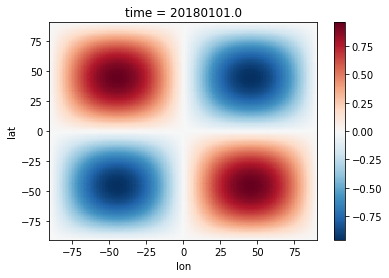

In [5]:
# Evaluation
o_local = sin_coords_node.eval(coordinates)
# Plot
o_local.plot()

# Evaluating node on AWS Cloud 

In [6]:
aws_lambda_manager = podpac.core.managers.aws_lambda.Lambda(source_node=sin_coords_node)
o_aws = aws_lambda_manager.eval(coordinates)
o_aws.plot()

WaiterError: Waiter ObjectExists failed: Max attempts exceeded